In [1]:
#!/usr/bin/env python

import trappy
from trace import Trace
import itertools
import logging
import pandas as pd
import numpy as np
import os

from conf import LisaLogging
LisaLogging.setup()
logging.info('#### Setup FTrace')
# path_to_html = "/home/joelaf/repo/lisa-aosp/external/lisa/results/UiBench_default/trace.html"
# path_to_html = "/home/joelaf/repo/lisa-aosp/external/lisa/ipynb/residency/trace-residency.html"
path_to_html = "/home/joelaf/repo/lisa-aosp/external/lisa/ipynb/residency/trace-residency-2.html"

2017-07-10 20:36:22,270 INFO    : root         : Using LISA logging configuration:
2017-07-10 20:36:22,271 INFO    : root         :   /home/joelaf/repo/lisa-aosp/external/lisa/logging.conf
2017-07-10 20:36:22,272 INFO    : root         : #### Setup FTrace


In [2]:
tr = Trace(None, path_to_html,
           cgroup_info = { 
               'cgroups': ['foreground', 'background', 'system-background', 'top-app', 'rt'],
               'controller_ids': { 4: 'cpuset', 2: 'schedtune' }
           },
           events=[ 'sched_switch', 'cgroup_attach_task_devlib', 'cgroup_attach_task', 'sched_process_fork' ],
        normalize_time=False)

# tr.data_frame.trace_event('cgroup_attach_task_devlib')
# len(tr.data_frame.trace_event('cgroup_attach_task_devlib').groupby(level=0).filter(lambda x: len(x) > 1))

/home/joelaf/repo/lisa-aosp/external/lisa/libs/utils/trace.py:258: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  window=window, normalize_time=normalize_time)


In [3]:
sdf = tr.data_frame.cpu_residencies('pid', 'sched_switch')

2017-07-10 20:36:27,123 INFO    : root         : TOTAL number of CPUs: 8
2017-07-10 20:36:27,125 INFO    : root         : TOTAL number of PIDs: 425
2017-07-10 20:36:27,126 INFO    : root         : TOTAL number of TGIDs: 424
2017-07-10 20:36:27,132 INFO    : Analysis     : switch out seen while no switch in 0
2017-07-10 20:36:27,134 INFO    : Analysis     : switch out seen while no switch in 9648
2017-07-10 20:36:27,136 INFO    : Analysis     : switch out seen while no switch in 9628
2017-07-10 20:36:27,137 INFO    : Analysis     : switch out seen while no switch in 0
2017-07-10 20:36:27,139 INFO    : Analysis     : switch out seen while no switch in 0
2017-07-10 20:36:27,140 INFO    : Analysis     : switch out seen while no switch in 9790
2017-07-10 20:36:27,141 INFO    : Analysis     : switch out seen while no switch in 0
2017-07-10 20:36:27,144 INFO    : Analysis     : switch out seen while no switch in 0
2017-07-10 20:36:27,803 INFO    : root         : Generating residency for 424 p

In [4]:
cdf = tr.data_frame.cpu_residencies('schedtune', 'sched_switch_cgroup')

2017-07-10 20:36:27,944 INFO    : root         : TOTAL number of CPUs: 8
2017-07-10 20:36:27,945 INFO    : root         : TOTAL number of PIDs: 425
2017-07-10 20:36:27,946 INFO    : root         : TOTAL number of TGIDs: 424
/home/joelaf/repo/lisa-aosp/external/trappy/trappy/utils.py:160: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = pd.concat([pr_df, sec_df], keys=['primary', 'secondary']).sort(columns='__line')
/home/joelaf/repo/lisa-aosp/external/lisa/libs/utils/trace.py:574: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  fdf = pd.concat([fdf, forkdf]).sort(columns='__line')
/home/joelaf/repo/lisa-aosp/external/lisa/libs/utils/trace.py:584: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  fdf = pd.concat([fdf, cdf]).sort(columns='__line')
2017-07-10 20:36:28,126 INFO    : Trace        : Couldn't attach all forks cgroup with-attach events (66 dropped)
2017-07-10 20:36:44,405 INFO    : Analysi

In [5]:
# Drop NaN
ncdf = cdf[pd.isnull(cdf.index) != True]

In [6]:
ncdf

,cpu_0,cpu_1,cpu_2,cpu_3,cpu_4,cpu_5,cpu_6,cpu_7,total
schedtune,,,,,,,,,
background,0.119465,0.196235,1.041122,0.011348,0.000000,0.000000,0.000104,0.335402,1.703676
foreground,4.181735,2.140197,2.255873,0.406813,0.116722,0.609774,0.047188,0.021547,9.779849
root,2.958884,0.769734,0.289709,0.093967,0.283383,0.237237,0.254874,0.353339,5.241127
top-app,0.375866,0.037917,0.062819,0.011858,1.274266,2.852455,0.086222,0.015798,4.717201


/home/joelaf/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Populating the interactive namespace from numpy and matplotlib


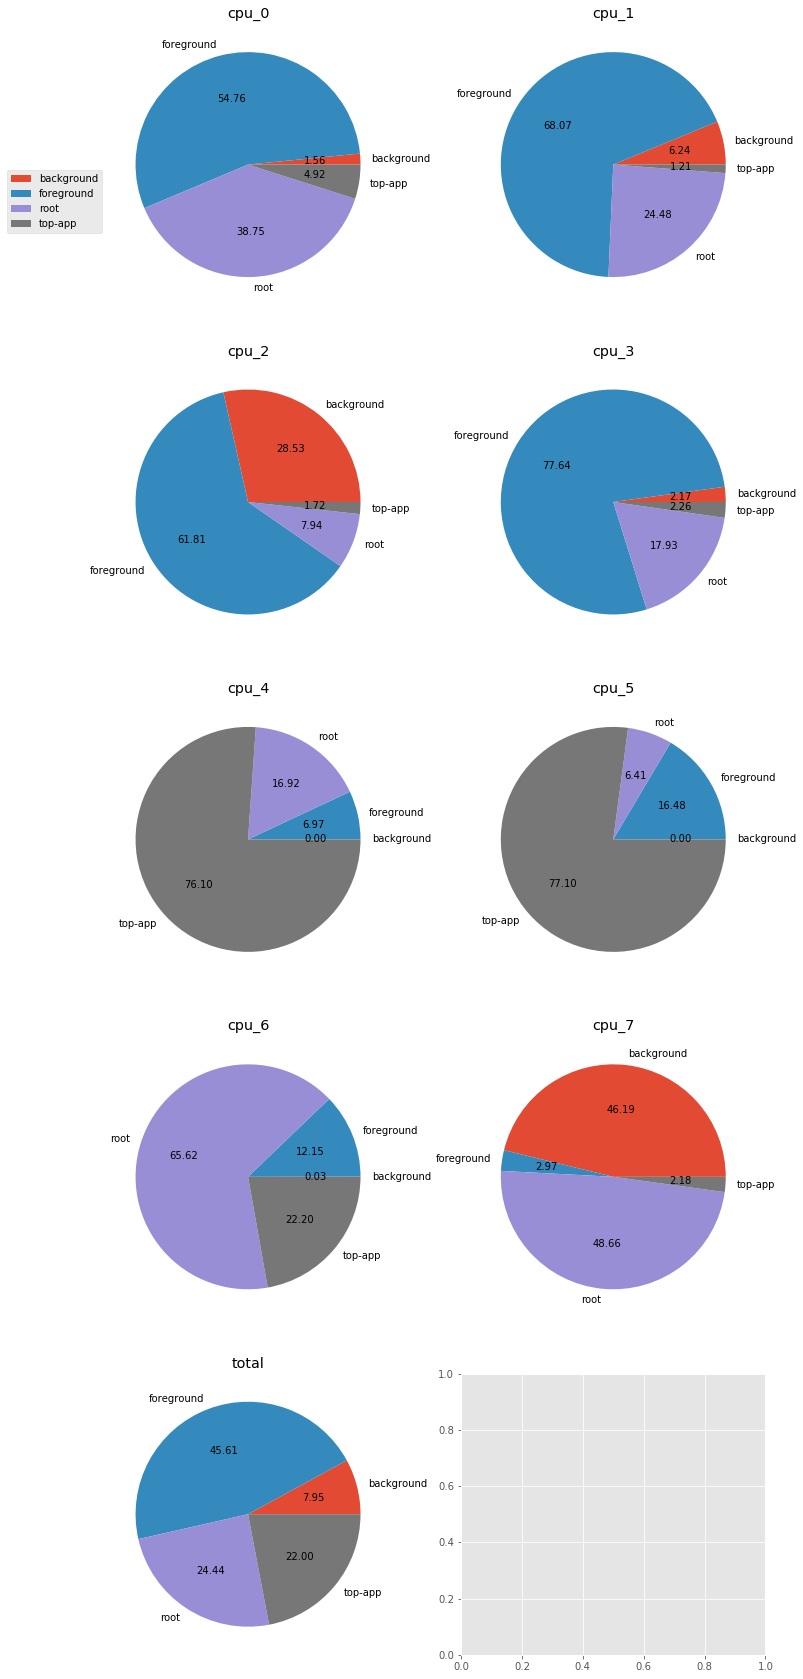

In [7]:
%pylab inline
# Bug in matplot lib causes plotting issues when residency is < 1
df = ncdf.apply(lambda x: x*10)
plt.style.use('ggplot')
colors = plt.rcParams['axes.color_cycle']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,30))

for ax, col in zip(axes.flat, df.columns):
    ax.pie(df[col], labels=df.index, autopct='%.2f', colors=colors)
    ax.set(ylabel='', title=col, aspect='equal')

axes[0, 0].legend(bbox_to_anchor=(0, 0.5))

# fig.savefig('your_file.png') # Or whichever format you'd like
plt.show()